In [1]:
# This cell is handling all the importing of libraries and tools
# imports tensorflow and tf.keras
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow import keras
print("Tensorflow Version:", tf.__version__)
print("Keras Version:", keras.__version__)

Tensorflow Version: 2.6.0
Keras Version: 2.6.0


In [2]:
# import NIST data base for hand written digits
# Print the shapes of data as loaded 
# then reshape to the data to flatten from 2 dimension (28,28) to 1 dimension (28*28)
# 
# X_train - array of gray scale image data with shapes containing traning data
# y_train - array of digit labels with shape for training data
# x_test - greyscale image data, test data
# y_test - digit labels, for test data

from keras.datasets import mnist

(Xtrain, ytrain), (Xtest, ytest) = mnist.load_data()

print('Xtrain', type(Xtrain), Xtrain.shape)
print('Xtest', type(Xtest), Xtest.shape)
print('ytrain', type(ytrain), ytrain.shape)
print('ytest', type(ytest), ytest.shape)


Xtrain = Xtrain.reshape(len(Xtrain), 28*28)
Xtest = Xtest.reshape(len(Xtest), 28*28)

print('Xtrain', type(Xtrain), Xtrain.shape)
print('Xtest', type(Xtest), Xtest.shape)
print('ytrain', type(ytrain), ytrain.shape)
print('ytest', type(ytest), ytest.shape)



Xtrain <class 'numpy.ndarray'> (60000, 28, 28)
Xtest <class 'numpy.ndarray'> (10000, 28, 28)
ytrain <class 'numpy.ndarray'> (60000,)
ytest <class 'numpy.ndarray'> (10000,)
Xtrain <class 'numpy.ndarray'> (60000, 784)
Xtest <class 'numpy.ndarray'> (10000, 784)
ytrain <class 'numpy.ndarray'> (60000,)
ytest <class 'numpy.ndarray'> (10000,)


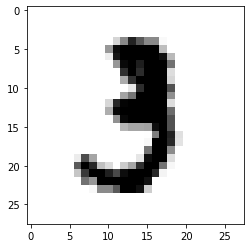

In [3]:
# remapping/reshaping back to 2 dimension and plotting first data point
# to visualize the data point

# changed to observer different digit

plt.imshow(Xtrain[10].reshape(28,28), cmap = plt.cm.binary, interpolation = 'nearest') 
plt.show()

{0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}


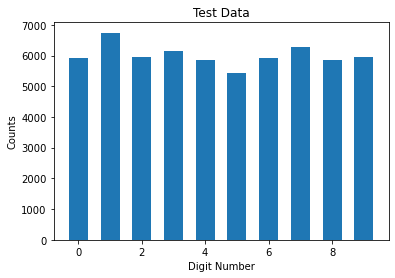

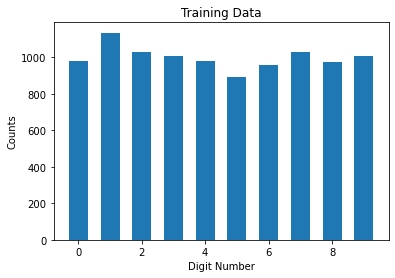

In [4]:
# Get distribution of data labels and plot in bar chart
digit_train, counts_train = np.unique(ytrain, return_counts = True)

distribution_train = dict(zip(digit_train, counts_train))
print(distribution_train )

plt.bar(list(distribution_train.keys()),distribution_train.values(),width =0.6)
plt.title('Test Data')
plt.xlabel('Digit Number')
plt.ylabel('Counts')
plt.show()

# display histogram for test data
digit_test, counts_test = np.unique(ytest, return_counts = True)
distribution_test = dict(zip(digit_test , counts_test))
plt.bar(list(distribution_test.keys()),distribution_test.values(),width =0.6)
plt.title('Training Data')
plt.xlabel('Digit Number')
plt.ylabel('Counts')
plt.show()


In [5]:
# splitting the training data into train and test subsets
# test size set to 1/12 proportion of the training data set

X_train, X_val, y_train, y_val  = train_test_split(Xtrain, ytrain, test_size = 1/3, random_state = 42)
print(X_train.shape, X_val.shape)
print(y_train, y_val)

(40000, 784) (20000, 784)
[8 9 7 ... 0 0 4] [7 3 8 ... 4 9 3]


In [6]:
## READ "Implementing MLPs with Keras" on Hands-On Machine Learning with Scikit-Learn, Keras & Tensorflow 
#(pages 295-308)

# Network Design 3
# 4 hidden layers alternating between sigmoid and relu activation functions
# with 200 neurons per layer
# Output layer using softmax activation function


from tensorflow.keras.optimizers import SGD

model = keras. models.Sequential()
model.add(keras.layers.Dense(200, activation ="sigmoid"))
model.add(keras.layers.Dense(200, activation ="relu"))
model.add(keras.layers.Dense(200, activation ="sigmoid"))
model.add(keras.layers.Dense(200, activation ="relu"))
model.add(keras.layers.Dense(10, activation = "softmax"))


sgd = SGD(learning_rate=0.001)
model.compile(optimizer=sgd,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

X_train = X_train.astype('float32')/255.0
y_train = y_train.astype('uint')
X_val = X_val.astype('float32')/255.0
y_val = y_val.astype('uint')



In [7]:
# training the model using model.fit()

performance = model.fit(X_train, y_train, batch_size=50, epochs=8, validation_data =(X_val,y_val))


Epoch 1/8
800/800 [==============================] - 3s 3ms/step - loss: 2.3046 - accuracy: 0.1081 - val_loss: 2.2966 - val_accuracy: 0.1120
Epoch 2/8
800/800 [==============================] - 2s 2ms/step - loss: 2.2946 - accuracy: 0.1146 - val_loss: 2.2922 - val_accuracy: 0.1121
Epoch 3/8
800/800 [==============================] - 2s 2ms/step - loss: 2.2902 - accuracy: 0.1145 - val_loss: 2.2881 - val_accuracy: 0.1120
Epoch 4/8
800/800 [==============================] - 2s 2ms/step - loss: 2.2862 - accuracy: 0.1164 - val_loss: 2.2838 - val_accuracy: 0.1340
Epoch 5/8
800/800 [==============================] - 2s 3ms/step - loss: 2.2822 - accuracy: 0.1339 - val_loss: 2.2799 - val_accuracy: 0.1120
Epoch 6/8
800/800 [==============================] - 2s 2ms/step - loss: 2.2778 - accuracy: 0.1502 - val_loss: 2.2758 - val_accuracy: 0.1120
Epoch 7/8
800/800 [==============================] - 2s 3ms/step - loss: 2.2734 - accuracy: 0.1346 - val_loss: 2.2706 - val_accuracy: 0.1459
Epoch 8/8
800

In [8]:
# print a summary of our model and each layer

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (50, 200)                 157000    
_________________________________________________________________
dense_1 (Dense)              (50, 200)                 40200     
_________________________________________________________________
dense_2 (Dense)              (50, 200)                 40200     
_________________________________________________________________
dense_3 (Dense)              (50, 200)                 40200     
_________________________________________________________________
dense_4 (Dense)              (50, 10)                  2010      
Total params: 279,610
Trainable params: 279,610
Non-trainable params: 0
_________________________________________________________________


In [9]:
# evaluate model on test data

X_test = Xtest.astype('float32')/255.0
y_test = ytest.astype('uint')


loss, acc = model.evaluate(X_test, y_test, verbose=0)
print('Accuracy: %.3f' % acc)
     

Accuracy: 0.115


In [10]:
# generate confusion matrix and classification report
# report shows scores for precision, recall, F1, and support scores of the model

from sklearn.metrics import classification_report, confusion_matrix



y_proba = model.predict(X_test) 
y_pred = np.argmax(y_proba,axis=1)
print('Confusion Matrix')
print(confusion_matrix(y_pred, y_test))
print('Classification Report')
print(classification_report(y_pred, y_test))


Confusion Matrix
[[   2    0    0    0    0    0    0    0    0    0]
 [ 976 1135 1031 1010  982  892  958 1014  974 1009]
 [   2    0    1    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0   14    0    0]
 [   0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0]]
Classification Report
              precision    recall  f1-score   support

           0       0.00      1.00      0.00         2
           1       1.00      0.11      0.20      9981
           2       0.00      0.33      0.00         3
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         0
           6       0.00      0.00      0.00        

E:\Users\tickn\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\Users\tickn\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\Users\tickn\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [11]:
# plotting accuracy vs epochs
performance.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

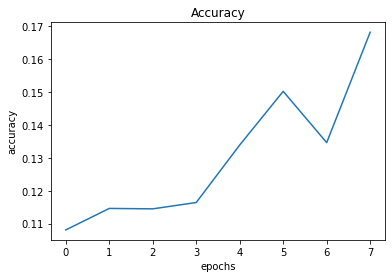

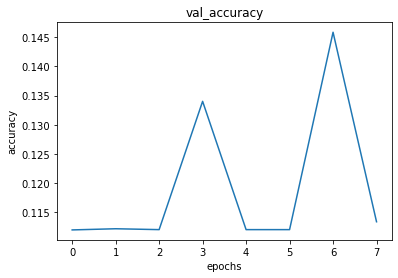

In [12]:
plt.plot(performance.history['accuracy'])
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.show()
plt.plot(performance.history['val_accuracy'])
plt.title('val_accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.show()

The baseline performance of the model uses a data split of 1/3 between the test and training data. Batch size is 50 and number of epochs is 8. Baseline accuracy of the model is low at 11.5%